In [1]:
%matplotlib notebook
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
from scipy.interpolate import RegularGridInterpolator
import h5py
import warnings
warnings.simplefilter('always', DeprecationWarning)
warnings.filterwarnings('ignore')

In [2]:
# March data comes here

droplets_Mar = np.array([79.00, 16.00, 21.00, 420.00, 292.00, 1186.00, 752.00, 1163.00, 793.00, 952.00, 494.00, 546.00])
frozen_Mar = np.array([0.00, 0.00, 0.00, 4.00, 6.00, 59.00, 57.00, 62.00, 64.00, 166.00, 282.00, 504.00])
percent_frozen_Mar = frozen_Mar/droplets_Mar*100.00
fraction_Mar = frozen_Mar/droplets_Mar
distance_Mar = np.array([11.0, 16.0, 20.0, 25.0, 30.0, 35.0, 37.5, 40.0, 42.5, 45.0, 47.5, 50.0])    # the x locations for the groups
#plt.plot(distance, percent_frozen, 'bo:')
upper_fraction = np.array([0,0,0,0,0.06567302924332255,0.07357908734073987,0.10341560747961133,0.0757360847833033,0.11451464419158291,0.20720067946483026,0.6357164312330963,0.9490560708385014])
lower_fraction = np.array([0,0,0,0,0.005890523463932408,0.03370216181687396,0.04681781968714787,0.032699954896416875,0.05523909898944391,0.1383130800558395,0.501720568866026,0.876527734852666])


In [3]:
# Oct data comes here

droplets_Oct = np.array([48.00, 39.00, 34.00, 210.00, 715.00, 881.00, 797.00, 292.00])
frozen_Oct = np.array([0.00, 1.00, 0.00, 13.00, 27.00, 33.00, 106.00, 49.00])
percent_frozen_Oct = frozen_Oct/droplets_Oct*100.00
fraction_Oct = frozen_Oct/droplets_Oct
distance_Oct = np.array([15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0])    # the x locations for the groups

In [4]:
# corrected fraction??
fraction_Oct = np.array([0.0, 0.02564103, 0.0, 0.06190476, 0.03776224,0.03745743, 0.13299875, 0.35])
percent_frozen_Oct = fraction_Oct*100.00

In [5]:
# 7dec data comes here

fraction_Dec = np.array([0.0458135861, 0.3621908127, 0.9865771812, 1.00])
percent_frozen_Dec = fraction_Dec*100.00
distance_Dec = np.array([40, 45, 47.5, 50])    # the x locations for the groups


In [6]:
# Laksmono comes here

distance_lak = np.array([12.349269, 21.407288, 30.603057, 40.403027, 45.600636, 50.630934])
percent_frozen_lak = np.array([0.00069, 0.00007, 0.001291, 0.181417, 0.835862, 0.970833])
fraction_lak = percent_frozen_lak*100


<IPython.core.display.Javascript object>


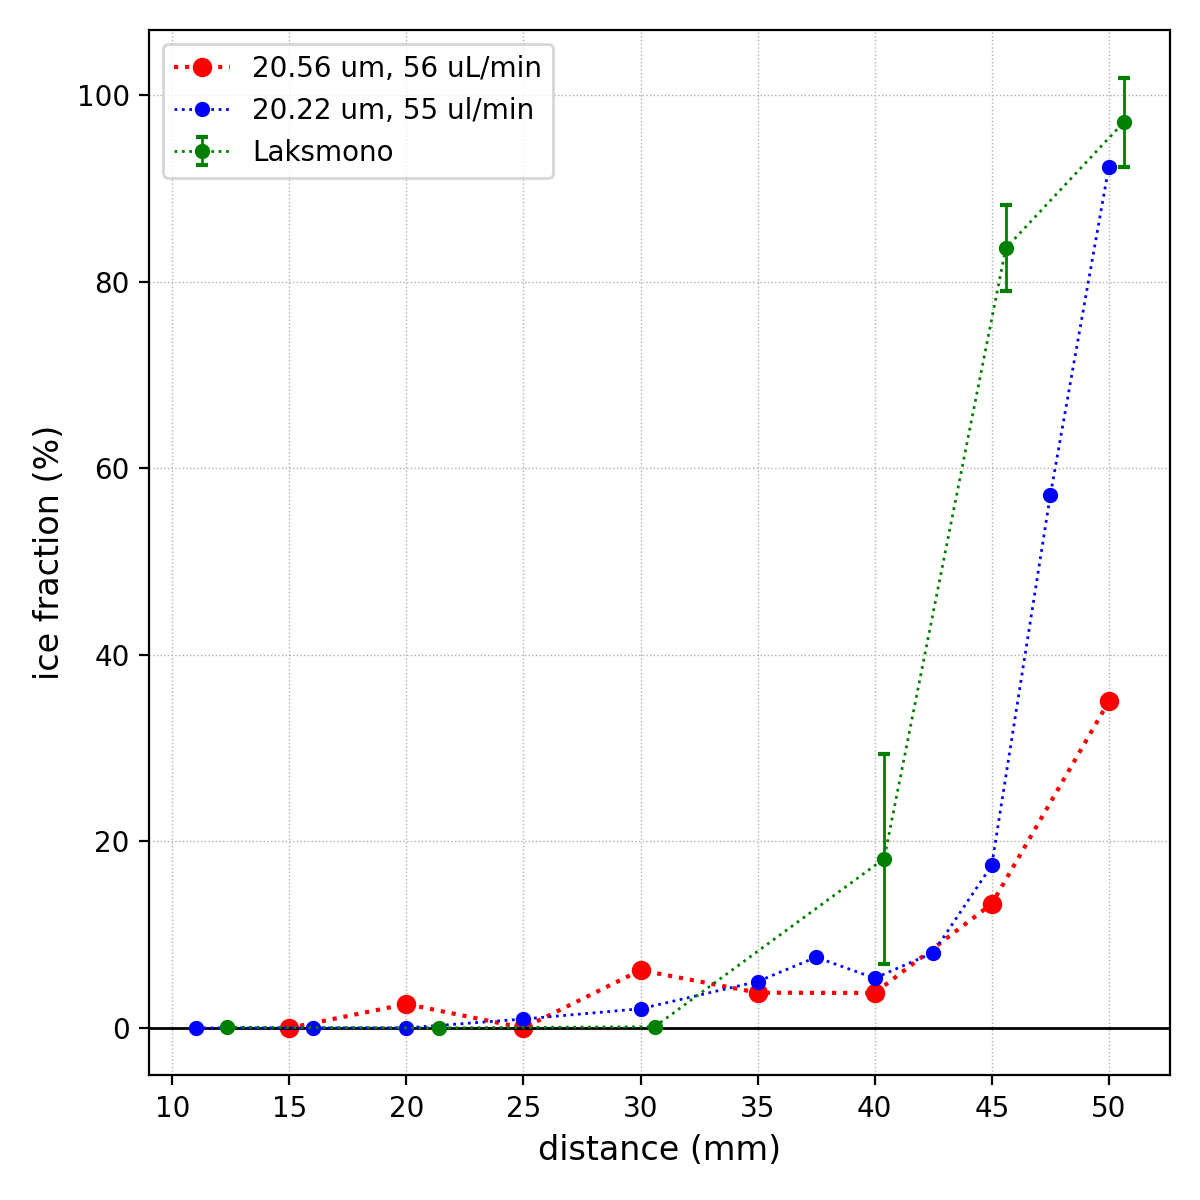

In [7]:
%matplotlib notebook
plt.figure(figsize=[6,6])
err_linestyle = {"linestyle":":", "linewidth":1, "markeredgewidth":1.5, "elinewidth":1, "capsize":2}
plt.plot(distance_Oct, percent_frozen_Oct, 'ro:', label='20.56 um, 56 uL/min')
plt.errorbar(distance_Mar, percent_frozen_Mar , fmt='bo', ms=4, label='20.22 um, 55 ul/min', **err_linestyle)
frac_error = np.array([0, 0, 0.0008, 0.112474, 0.045871, 0.04801])
plt.errorbar(distance_lak, fraction_lak, yerr=frac_error*100, fmt='go', label='Laksmono', ms=4, **err_linestyle)
plt.ylabel('ice fraction (%)', fontsize = 12)
plt.xlabel('distance (mm)', fontsize = 12)
#plt.title('percentage of frozen droplets')
plt.axhline(0,c='black',lw=1)
plt.grid(linestyle='dotted', lw=0.5)
plt.legend(loc='upper left',fontsize=10)
plt.tight_layout()
plt.show()

In [8]:
# J for Laksmono 12 um
Laksmono_temp = np.array([230.420529200,228.19497310,227.07574645])
J_Laksmono_12 = np.array([2.11E+11,3.22E+12,3.58E+12])*1E+6
error_12_low= np.array([3.12E+12,4.60E+13,5.76E+13])*1E+6
error_12_high= np.array([-1.38E+11,-7.90E+11,-2.79E+12])*1E+6
T_err_12_low = np.array([-1.00,-1.00,-1.00])
T_err_12_high = np.array([2.00, 2.00, 2.00])
# J laksmono 9 um
temp_9 = np.array([231.794450,229.16255000])
T_err_9_low = np.array([-1.00,-1.00])
T_err_9_high = np.array([2.00, 2.00])
J_Laksmono_9 = np.array([2.69E+11, 8.45E+11])*1E+6
J_low_9 = np.array([-3.90E+10, -3.71E+11])*1E+6
J_high_9 = np.array([3.81E+12, 1.22E+13])*1E+6

In [9]:
# J for Mar

T_ideal_Mar = np.array([243.76451078950072,240.19707963618526,237.72023607901207,235.58559408884236,233.94843493, 232.89695972, 232.27005986, 231.69265282, 231.15815199, 230.66115462, 230.1971802])
#T_ideal_Mar = np.array([233.94843493, 232.89695972, 232.27005986, 231.69265282, 231.15815199, 230.66115462, 230.1971802, nan])
#J_ideal_Mar=np.array([1.68232216e+16, 2.61881701e+16, -1.75528173e+16, 0.00000000e+00,9.18486732e+16, 6.30783119e+17, 1.25804253e+18, nan])
J_ideal_Mar=np.array([0.,0.,3.75838362e+15, 4.39584889e+15, 1.68232216e+16, 2.61881701e+16, -1.75528173e+16, 0.00000000e+00,9.18486732e+16, 6.30783119e+17, 1.25804253e+18])
T_low_Mar =np.array([0.,0.,0.,0.,1.37549529,1.3380407,1.31560586,1.29491247,1.27575766,1.2579688,1.24139819])
T_high_Mar=np.array([0.,0.,0.,0.,1.60437852,1.56176101,1.5360675,1.51226229,1.49013908,1.46952048,1.45025184])
J_low_Mar=np.array([0.,0.,0.,0,1.24060483e+16,2.63063253e+16,3.63343498e+16,3.05790466e+16,4.13242942e+16,2.38396441e+17,5.15445202e+17])
J_high_Mar=np.array([0.,0.,0.,0.,1.77331626e+16,3.50048900e+16,3.12403173e+16,3.13769948e+16,6.95374474e+16,4.06281363e+17,9.22613175e+17])

# Count errors for Mar
Distances_Mar= np.array([30, 35, 37.5, 40, 42.5, 45, 47.5, 50])
Low_error_Mar= np.array([0.,0.,0.,0.0,0.01410948,0.01809584,0.02671807,0.02099848,0.02295062,0.03168692,0.06790826,0.04347227])
High_error_Mar= np.array([0.,0.,0.,0.0,0.04567303,0.02521528,0.03647552,0.02905958,0.03293659,0.03720068,0.06351455,0.02905607])                     
                       
                       
# J for Nov                     
T_ideal_Nov = np.array([242.0594692,239.17767685,237.00287376,235.27730872,233.85920182,232.66300914,231.63352692, np.nan])
J_ideal_Nov = np.array([1.79559634e+16,-1.79559634e+16,3.64760799e+16,-1.24111649e+16,0.00000000e+00,5.80312652e+16,1.71854035e+17, np.nan])
T_low_Nov = np.array([1.53828937,1.45160709,1.37982903,1.32110787,1.27205629,1.23043099,1.19463196, np.nan])
T_high_Nov = np.array([1.54383905,1.46331537,1.39710141,1.34169907,1.29471735,1.25414298,1.21888026, np.nan])
J_low_Nov = np.array([1.79559634e+16,4.50803336e+16,1.65475224e+16,2.14709590e+16,9.85124229e+15, 1.89573154e+16, 8.07969382e+16, np.nan])
J_high_Nov = np.array([4.50803336e+16,1.79559634e+16, 2.38743069e+16, 1.76534113e+16,9.45245282e+15, 2.46130850e+16, 1.10706725e+17, np.nan])                       

                    
# Count errors for Nov
Distances_Nov=np.array([15, 20, 25, 30, 35, 40, 45, 50])
Low_error_Nov=np.array([0.0, 0.02543297, 0.0, 0.02489324, 0.01207643, 0.01106828, 0.02158504, 0.09340176])
High_error_Nov =np.array([0.07410265, 0.14251847, 0.10151791, 0.04070218, 0.01699306, 0.01506252, 0.02513479, 0.10652174])
                        

In [10]:
fract_Lak_9um = np.array([1.00E-03, 4.80E-02,1.83E-01])*100
sample_dist_9m= np.array([25.88,36.04,46.09])
error_9um = np.array([1.00E-03, 6.00E-03,5.10E-02])

In [11]:
# load text file MC error
data = np.loadtxt('/Users/niloo/Desktop/Lab_data/altogether/MC_error/Dec_7_interpolatedpos.txt')
Temperature_Dec = data[:,4]
J_Dec = data[:,-3]
T_low_Dec =data[:,5]
T_high_Dec = data[:,6]
J_low_Dec = data[:,-2]
J_high_Dec = data[:,-1]

In [12]:
# load text file MC error
data = np.loadtxt('/Users/niloo/Desktop/Lab_data/altogether/MC_error/Nov_3_interpolatedpos.txt')
Temperature_Nov = data[:,4]
J_Nov = data[:,-3]
T_low_Nov =data[:,5]
T_high_Nov = data[:,6]
J_low_Nov = data[:,-2]
J_high_Nov = data[:,-1]

In [13]:
# load text file MC error
data = np.loadtxt('/Users/niloo/Desktop/Lab_data/altogether/MC_error/Mar_12_interpolatedpos.txt')
Temperature_Mar = data[:,4]
J_Mar = data[:,-3]
T_low_Mar =data[:,5]
T_high_Mar = data[:,6]
J_low_Mar = data[:,-2]
J_high_Mar = data[:,-1]

In [14]:
# load Murray 2010 data Run1
data = np.loadtxt('/Users/niloo/Desktop/Lab_data/altogether/Murray_dataset/Ben1.txt')
T_Ben1 = data[:,0]
J_Ben1 = data[:,1]*10**6
J_up_Ben1 =data[:,2]*10**6
J_down_Ben1 = data[:,3]*10**6

In [15]:
# load Murray 2010 data Run2
data = np.loadtxt('/Users/niloo/Desktop/Lab_data/altogether/Murray_dataset/Ben2.txt')
T_Ben2 = data[:,0]
J_Ben2 = data[:,1]*10**6
J_up_Ben2 =data[:,2]*10**6
J_down_Ben2 = data[:,3]*10**6

In [29]:
# load Butorin Skripov data
data = np.loadtxt('/Users/niloo/Desktop/Lab_data/altogether/Stockel/Nukleationsraten/VerglH2O_D2Ob_farbig_Diagramm_OPJ/ButorinSkripov.txt')
T_Butorin = data[:,0]
J_Butorin = data[:,1]*10**6

In [33]:
# load Demott data
data = np.loadtxt('/Users/niloo/Desktop/Lab_data/altogether/Stockel/Nukleationsraten/VerglH2O_D2Ob_farbig_Diagramm_OPJ/Demott.txt')
T_Demott = data[:,0]
J_Demott = data[:,1]*10**6
J_Up_Demott = data[:,2]*10**6
J_down_Demott = data[:,3]*10**6
dT_Demott = data[:,5]



In [37]:
# Load data ???
data = np.loadtxt('/Users/niloo/Desktop/Lab_data/altogether/Stockel/Nukleationsraten/VerglH2O_D2Ob_farbig_Diagramm_OPJ/stockel.txt')
T_stockel = data[:,0]
J_stockel = data[:,2]*10**6

In [51]:
# load Stockel H2o data
data = np.loadtxt('/Users/niloo/Desktop/Lab_data/altogether/Stockel/Nukleationsraten/VerglH2O_D2Ob_farbig_Diagramm_OPJ/stocwater.txt')
T_wasser = data[:,0]
J_wasser = data[:,1]*10**6

In [42]:
# load Pruppacher data
data = np.loadtxt('/Users/niloo/Desktop/Lab_data/altogether/Stockel/Nukleationsraten/VerglH2O_D2Ob_farbig_Diagramm_OPJ/prappu95.txt')
T_prapp = data[:,0]
J_prapp = data[:,1]*10**6

In [45]:
# load Murray 2021 (latest publication)

Run1 = np.loadtxt('/Users/niloo/Desktop/Lab_data/altogether/Murray_dataset/Murray_Run1.txt')
Run2 = np.loadtxt('/Users/niloo/Desktop/Lab_data/altogether/Murray_dataset/Murray_Run2.txt')
Run3 = np.loadtxt('/Users/niloo/Desktop/Lab_data/altogether/Murray_dataset/Murray_Run3.txt')

# Run 1
T_Murray_R1 = Run1[:,0] + 273.
T_R1_err = Run1[:,1]
J_Murray_R1 = Run1[:,2]*10**6
J_R1_up = Run1[:,3]*10**6
J_R1_down = Run1[:,4]*10**6

# Run 2
T_Murray_R2 = Run2[:,0] + 273.
T_R2_err = Run2[:,1]
J_Murray_R2 = Run2[:,2]*10**6
J_R2_up = Run2[:,3]*10**6
J_R2_down = Run2[:,4]*10**6

# Run 3
T_Murray_R3 = Run3[:,0] + 273.
T_R3_err = Run3[:,1]
J_Murray_R3 = Run3[:,2]*10**6
J_R3_up = Run3[:,3]*10**6
J_R3_down = Run3[:,4]*10**6

<IPython.core.display.Javascript object>


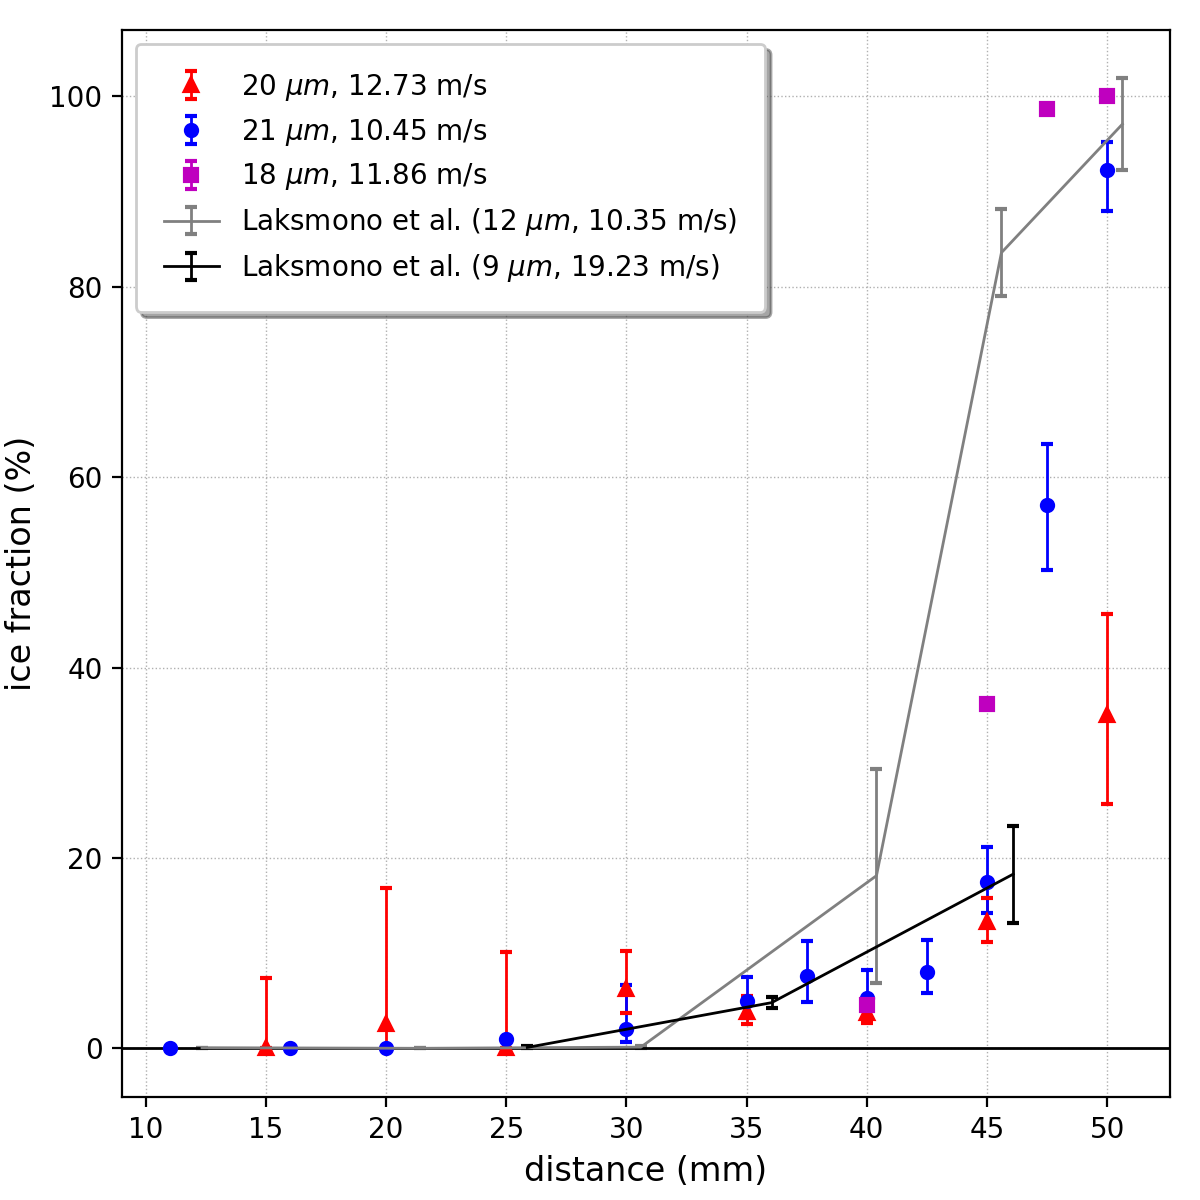

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [46]:
# Plot ice fraction
%matplotlib notebook
plt.figure(figsize=[6,6])
plt.errorbar(Distances_Nov, percent_frozen_Oct, yerr=[Low_error_Nov*100, High_error_Nov*100], fmt='r^', ms=4, label='20 $\mu m$, 12.73 m/s', **err_linestyle)
plt.errorbar(distance_Mar, percent_frozen_Mar, yerr=[Low_error_Mar*100, High_error_Mar*100], fmt='bo', ms=4, label='21 $\mu m$, 10.45 m/s', **err_linestyle)
err_dec = [0,0,0,0]
plt.errorbar(distance_Dec, percent_frozen_Dec, yerr=[err_dec, err_dec], fmt='ms', ms=4, label='18 $\mu m$, 11.86 m/s', **err_linestyle)
frac_error = np.array([0, 0, 0.0008, 0.112474, 0.045871, 0.04801])
plt.errorbar(distance_lak, fraction_lak, yerr=frac_error*100, fmt='grey', label='Laksmono et al. (12 $\mu m$, 10.35 m/s)', ms=4, **err_linestyle)
plt.errorbar(sample_dist_9m, fract_Lak_9um, yerr=error_9um*100, fmt='k', label='Laksmono et al. (9 $\mu m$, 19.23 m/s)', ms=4, **err_linestyle)
plt.ylabel('ice fraction (%)', fontsize = 12)
plt.xlabel('distance (mm)', fontsize = 12)
#plt.title('percentage of frozen droplets')
plt.axhline(0,c='black',lw=1)
plt.grid(linestyle='dotted', lw=0.5)
plt.legend(loc='upper left',fontsize=10, fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.savefig('/Users/niloo/Desktop/manuscript/ice_fraction/figs_Ice/Fig2.eps', format='eps')
plt.tight_layout()
plt.show()

In [47]:
# Nucleation fit Murray 2010
T = np.linspace(235,237,1000)
Jhom = np.exp(-2.92*T + 706.5)

<IPython.core.display.Javascript object>


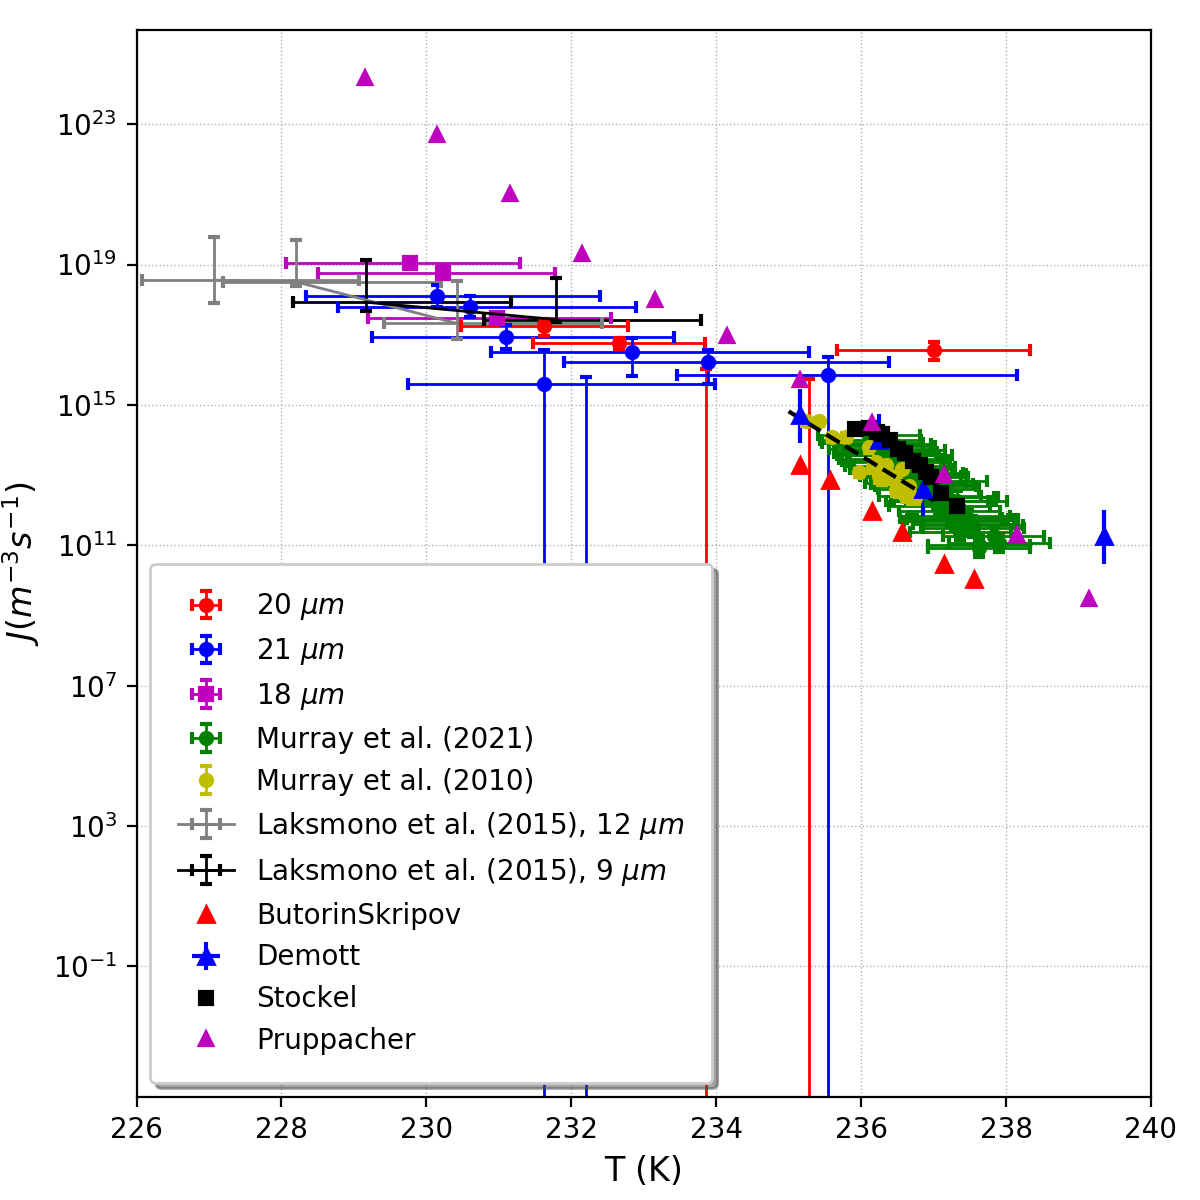

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [54]:
# Plot Nucleation datasets
%matplotlib notebook
plt.figure(figsize=[6,6])
err_linestyle = {"linewidth":1, "markeredgewidth":1.5, "elinewidth":1, "capsize":2}
plt.errorbar(Temperature_Nov, J_Nov, yerr=[J_low_Nov, J_high_Nov], xerr=[T_low_Nov,T_high_Nov], fmt='ro', ms=4, label='20 $\mu m$', **err_linestyle)
plt.errorbar(Temperature_Mar, J_Mar, yerr=[J_low_Mar,J_high_Mar], xerr=[T_low_Mar, T_high_Mar], fmt='bo', ms=4, label='21 $\mu m$', **err_linestyle)
plt.errorbar(Temperature_Dec, J_Dec, yerr=[J_low_Dec, J_high_Dec], xerr = [T_low_Dec,T_high_Dec], fmt='ms', ms=4, label='18 $\mu m$', **err_linestyle)
plt.errorbar(T_Murray_R1, J_Murray_R1, yerr=[J_R1_down, J_R1_up], xerr=[T_R1_err, T_R1_err], fmt='go', ms=4, label='Murray et al. (2021)', **err_linestyle)
plt.errorbar(T_Murray_R2, J_Murray_R2, yerr=[J_R2_down, J_R2_up], xerr=[T_R2_err, T_R2_err], fmt='go', ms=4, **err_linestyle)
plt.errorbar(T_Murray_R3, J_Murray_R3, yerr=[J_R3_down, J_R3_up], xerr=[T_R3_err, T_R3_err], fmt='go', ms=4, **err_linestyle)
plt.errorbar(T_Ben1, J_Ben1, yerr=[J_down_Ben1, J_up_Ben1], fmt='yo', ms=4, label='Murray et al. (2010)', **err_linestyle)
plt.errorbar(T_Ben2, J_Ben2, yerr=[J_down_Ben2, J_up_Ben2], fmt='yo', ms=4, **err_linestyle)
plt.errorbar(Laksmono_temp, J_Laksmono_12, yerr=[-error_12_low,error_12_high], xerr=[-T_err_12_low,T_err_12_high], fmt='grey', label='Laksmono et al. (2015), 12 $\mu m$', ms=4, **err_linestyle)
plt.errorbar(temp_9, J_Laksmono_9, yerr=[-J_low_9,J_high_9], xerr=[-T_err_9_low,T_err_9_high], fmt='k', label='Laksmono et al. (2015), 9 $\mu m$', ms=4, **err_linestyle)
plt.errorbar(T, Jhom*10**6, fmt = 'k--')
plt.errorbar(T_Butorin, J_Butorin, fmt='r^', label = 'ButorinSkripov')
plt.errorbar(T_Demott, J_Demott, xerr=[-dT_Demott,dT_Demott], yerr=[J_down_Demott, J_Up_Demott], fmt='b^', label = 'Demott')
plt.errorbar(T_wasser, J_wasser, fmt='ks', label='Stockel', ms=4, **err_linestyle)
plt.errorbar(T_prapp, J_prapp, fmt='m^', label='Pruppacher', ms=4, **err_linestyle)
#plt.errorbar(Laksmono_temp, J_Laksmono_12, fmt='go', label='Laksmono et al. (12 $\mu m$, 10.35 m/s)', ms=4, **err_linestyle)
#plt.errorbar(temp_9, J_Laksmono_9, fmt='ko', label='Laksmono et al. (9 $\mu m$, 19.23 m/s)', ms=4, **err_linestyle)
plt.yscale('log')
plt.ylabel('$J (m^{-3}s^{-1})$', fontsize = 12)
plt.xlabel('T (K)', fontsize = 12)
plt.xlim(226, 240)
plt.axhline(0,c='black',lw=1)
plt.grid(linestyle='dotted', lw=0.5)
plt.legend(loc='lower left',fontsize=10, fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.savefig('/Users/niloo/Desktop/manuscript/ice_fraction/figs_Ice/Fig3.eps', format='eps')
plt.tight_layout()
plt.show()